In [44]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

import os

<h2> Данные: Online Shoppers Purchasing Intention

Мотивационная статья:  C. O. Sakar, S. O. Polat, M. Katircioglu, and Y. Kastro, “Real-time
prediction of online shoppers purchasing intention using multilayer
perceptron and lstm recurrent neural networks,” Neural Computing and
Applications, vol. 31, no. 10, pp. 6893–6908, 2019.

Собраны различные характеристики сессий покупателей в онлайн-магазине. Цель: предсказывать поведение потенциального покупателя. Распознавать намерение что-то купить. 
Товар определенного вида собираются показывать только пользователям, у которых есть намерение совершить покупку.

10 количественных переменных, 8 категориальных.

Набор данных был сформирован таким образом, чтобы каждый сеанс принадлежал отдельному пользователю в течение 1 года, чтобы избежать какой-либо тенденции к конкретной кампании, особому дню, профилю пользователя или периоду.

Предсказываем Revenue. Revenue -- купил в итоге человек что-то или сессия закончилась без покупки.

Признаки:

* "Administrative" -- Количество посещенных посетителем страниц об управлении аккаунтом в этом сеансе
* "Administrative Duration" -- Общее количество времени (в секундах), которое посетитель провел на страницах, связанных с управлением аккаунтом.
* "Informational" -- Количество посещенных посетителем страниц, содержащих информацию о самом сайте, контактах для связи, адресах и т.д.
* "Informational Duration" -- Общее количество времени (в секундах), которое посетитель провел на этих информационных страницах.
* "Product Related"  --  Количество посещенных посетителем страниц, связанных с продуктом.
* "Product Related Duration" --   Общее количество времени (в секундах), которое посетитель провел на страницах, связанных с продуктом.
* "Bounce Rate", "Exit Rate", "Page Value" -- показатели, измеряемые с помощью «Google Analytics» для каждой страницы на сайте электронной коммерции. («Показатель отказов», «Коэффициент выхода» и «Значение страницы»). Эти три показателя касаются конкретных страниц, в датасете у нас средние показатели по всем посещенным пользователем в этом сеансе страницам. 
* "Bounce Rate" («Показатель отказов») для веб-страницы относится к проценту посетителей, которые заходят на сайт с этой страницы и затем уходят («отказываются»), не вызывая никаких других запросов к аналитическому серверу во время этого сеанса. В данных -- средний показатель "Bounce Rate" по всем посещенным пользователем в этом сеансе страницах.
* "Exit Rate" -- процент пользователей, для которых эта страница -- последняя в сессии,  относительно всех пользователей, просмотревших эту страницу. (Правильнее так: процент просмотров этой страницы, которые были последними в сеансе на сайте, относительно всех просмотров этой страницы). В датасете -- среднее значение по просмотренным страницам.
* "Page Value" -- Сколько в среднем заходит на эту страницу пользователей, которые заканчивают транзакцией? 
*  "Special Day" -- степень близости времени посещения сайта к определенному особому дню (например, Дню матери, Дню святого Валентина), в котором сессии с большей вероятностью будут завершены транзакцией. Значение этого атрибута определяется с учетом динамики электронной торговли, например, учитывается время между датой заказа и датой доставки. Например, для дня Валентина, это значение принимает ненулевое значение между 2 февраля и 12 февраля, ноль до и после этих чисел, если оно не близко к другому особенному дню, и его максимальное значение 8 февраля.
* "operating system" -- перационка пользователя.
* "browser" -- браузер пользователя.
* "region" -- географический регион, из которого пользователь начал сессию.
* "traffic type" -- источник трафика, с помощью которого посетитель вошел на сайт.
* "visitor type" -- "returning", "new visitor","Other" -- тип посетителя
* "Weekend" -- дата посещения -- выходной или нет
* "Month" -- месяц.
* "Revenue" -- метка класса, указывающая, было ли посещение завершено транзакцией (покупкой).

In [2]:
df=pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.shape

(12330, 18)

<h2> Data Preprocessing

Проверяем на наличие NaN:

In [3]:
df.isnull().sum().sum()

0

In [4]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Если верить тому, что мы видим, у нас всего 2 категориальные переменные -- это месяц и тип пользователя (+ еще 2 булевские). 

На самом деле некоторые переменные (например, браузер, регион, операционка, источник трафика), которые здесь обозначены как целочисленные -- тоже категориальные и как колчественные признаки их рассматривать нельзя (тут такая кодировка неоправданна по смыслу + у нас нет информации о том, какие, например, браузеры закодированы какими числами и можно ли их так упорядочивать. Можно было бы подумать, что они упорядочены по частоте/популярности, но это не так. Да и всяко операции как с количественными будут неоправданы (браузер1+браузер2!=браузер3)).

В общем, нужно сделать эти признаки качественными и создать фиктивные переменные для них. 

In [5]:
df.iloc[:,11:16] = df.iloc[:,11:16].astype('object')

In [6]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems            object
Browser                     object
Region                      object
TrafficType                 object
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Создадим фиктивные переменные для качественных признаков:

In [7]:
df_dummy = pd.get_dummies(df,drop_first=True)
df_dummy.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Revenue', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7',
       'OperatingSystems_8', 'Browser_2', 'Browser_3', 'Browser_4',
       'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9',
       'Browser_10', 'Browser_11', 'Browser_12', 'Browser_13', 'Region_2',
       'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
       'TrafficType_9', 'TrafficType_10', 'TrafficT

In [8]:
df_dummy.shape

(12330, 69)

Булевские лучше закодируем как 0-1:

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_dummy['Revenue'] = le.fit_transform(df_dummy['Revenue'])
df_dummy['Weekend'] = le.fit_transform(df_dummy['Weekend'])
df_dummy.iloc[:,1:20].head()

,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct
0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,0,0,1,0,0,0,0,0,0
1,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,0,0,0,1,0,0,0,0,0,0
2,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,0,0,1,0,0,0,0,0,0
3,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,0,0,0,1,0,0,0,0,0,0
4,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,1,0,0,1,0,0,0,0,0,0


Разобъем на train и test. 

Без dummy-признаков тоже разбили, на таких данных удобнее смотреть на описательные статистики.

In [10]:
df_train, df_test = train_test_split(df, test_size=0.3,random_state=16)
X_train=df_train.drop('Revenue', axis=1)
y_train=df_train['Revenue']

ss = StratifiedShuffleSplit(n_splits=1, test_size=0.3,random_state=16)
train_index, test_index = next(ss.split(df_dummy.drop(['Revenue'], axis=1), df_dummy['Revenue']))
df_train_d = pd.DataFrame(np.array(df_dummy)[train_index], columns=df_dummy.columns)
df_test_d = pd.DataFrame(np.array(df_dummy)[test_index], columns=df_dummy.columns)
X_train_d, y_train_d = df_train_d .loc[:, df_train_d.columns != 'Revenue'], df_train_d['Revenue']
X_test_d, y_test_d = df_test_d.loc[:, df_test_d.columns != 'Revenue'], df_test_d['Revenue']

Датасеты с фиктивными переменными перепишем в файлы, чтобы их использовать в других notebooks.

In [11]:
X_train_d.to_csv('X_train.csv', index=False)
X_test_d.to_csv('X_test.csv', index=False)
y_train_d.to_csv('y_train.csv', index=False)
y_test_d.to_csv('y_test.csv', index=False)

<h2> Краткая характеристика данных и постановка задачи

Посмотрим на описательные статистики для количественных переменных:

In [14]:
numerical_columns = [c for c in df.columns if df[c].dtype.name in ['int64','float64']]
X_train.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000
mean,2.331480,81.850595,0.508748,35.567097,31.772448,1201.989211,0.022264,0.042965,5.792455,0.062704
std,3.345474,180.383046,1.287568,145.555830,44.659423,1993.672381,0.048562,0.048644,17.546295,0.200551
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,188.500000,0.000000,0.014286,0.000000,0.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,597.250000,0.003082,0.025000,0.000000,0.000000
75%,4.000000,94.241667,0.000000,0.000000,38.000000,1471.412500,0.016923,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,270.784693,1.000000


Для остальных:

In [15]:
X_train.describe(include=[object,bool])

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
count,8631,8631,8631,8631,8631,8631,8631
unique,10,8,13,9,18,3,2
top,May,2,2,1,2,Returning_Visitor,False
freq,2373,4623,5568,3370,2775,7394,6625


Отметим сразу, что присутствует дисбаланс классов:

Text(0, 0.5, 'Count')

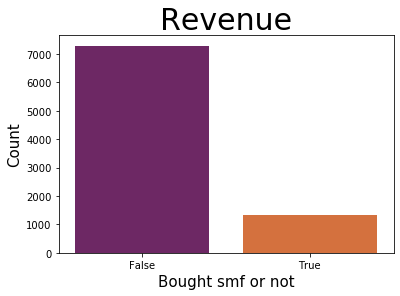

In [16]:
sns.countplot(y_train, palette = 'inferno')
plt.title('Revenue', fontsize = 30)
plt.xlabel('Bought smf or not', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

In [17]:
y_train_d.value_counts()

0.0    7295
1.0    1336
Name: Revenue, dtype: int64

Поэтому при дальнейшей оценке классификации на accuracy особого смысла нет смотреть. В качестве метрики-критерия будем использовать f1-score. (именно его отчасти для того, чтобы сравнивать с результатами, полученными в мотивирующей статье)

In [48]:
Image(filename='tab.jpg',width=300) 

$\mathrm{precision}=\frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FP}}$  
$\mathrm{recall} = \frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}$  
$\mathrm{f1}= \frac{2\mathrm{precision}*\mathrm{recall}}{\mathrm{precision}+\mathrm{recall}}$

(в зависимости от того, что считается за positive, а что за negative, иногда пишут наоборот (т.е. N<->P)

1) -- предсказали, что не купит, а на самом деле купил. => не показали особую рекламу, потеряли деньги.  
2) -- предсказали, что купит, а на самом деле он покупать  не собирался. => зря показали специальную рекламу. Нериятно, но не сильно страшно.

Помимо f1-score для каждого класса далее иногда будут выводиться следующие варианты f1:
- weighted - вычисляет оценку f1 для каждого класса независимо, но при сложении использует веса, которые зависят от размер класса. $weighted=F1_{class1} * W_{1} + F1_{class2} * W_{2}$.
- macro - вычисляет F1, разделенный по классу, но не используя веса. $macro=(F1_{class1} +F2_{class2})/2$.

Из них при дисбалансе классов лучше всего использовать $macro$. 

Но для грида и тд я все же использовала просто $f1$ для класса "купил", так как он для нас важнее.

Итак, требуется найти метод, который будет правильно классифицировать пользователей с намерением совершить покупку. В этой знадаче для нас может быть важен не только ответ "да"/"нет", но веростность совершения/несовершения покупки.

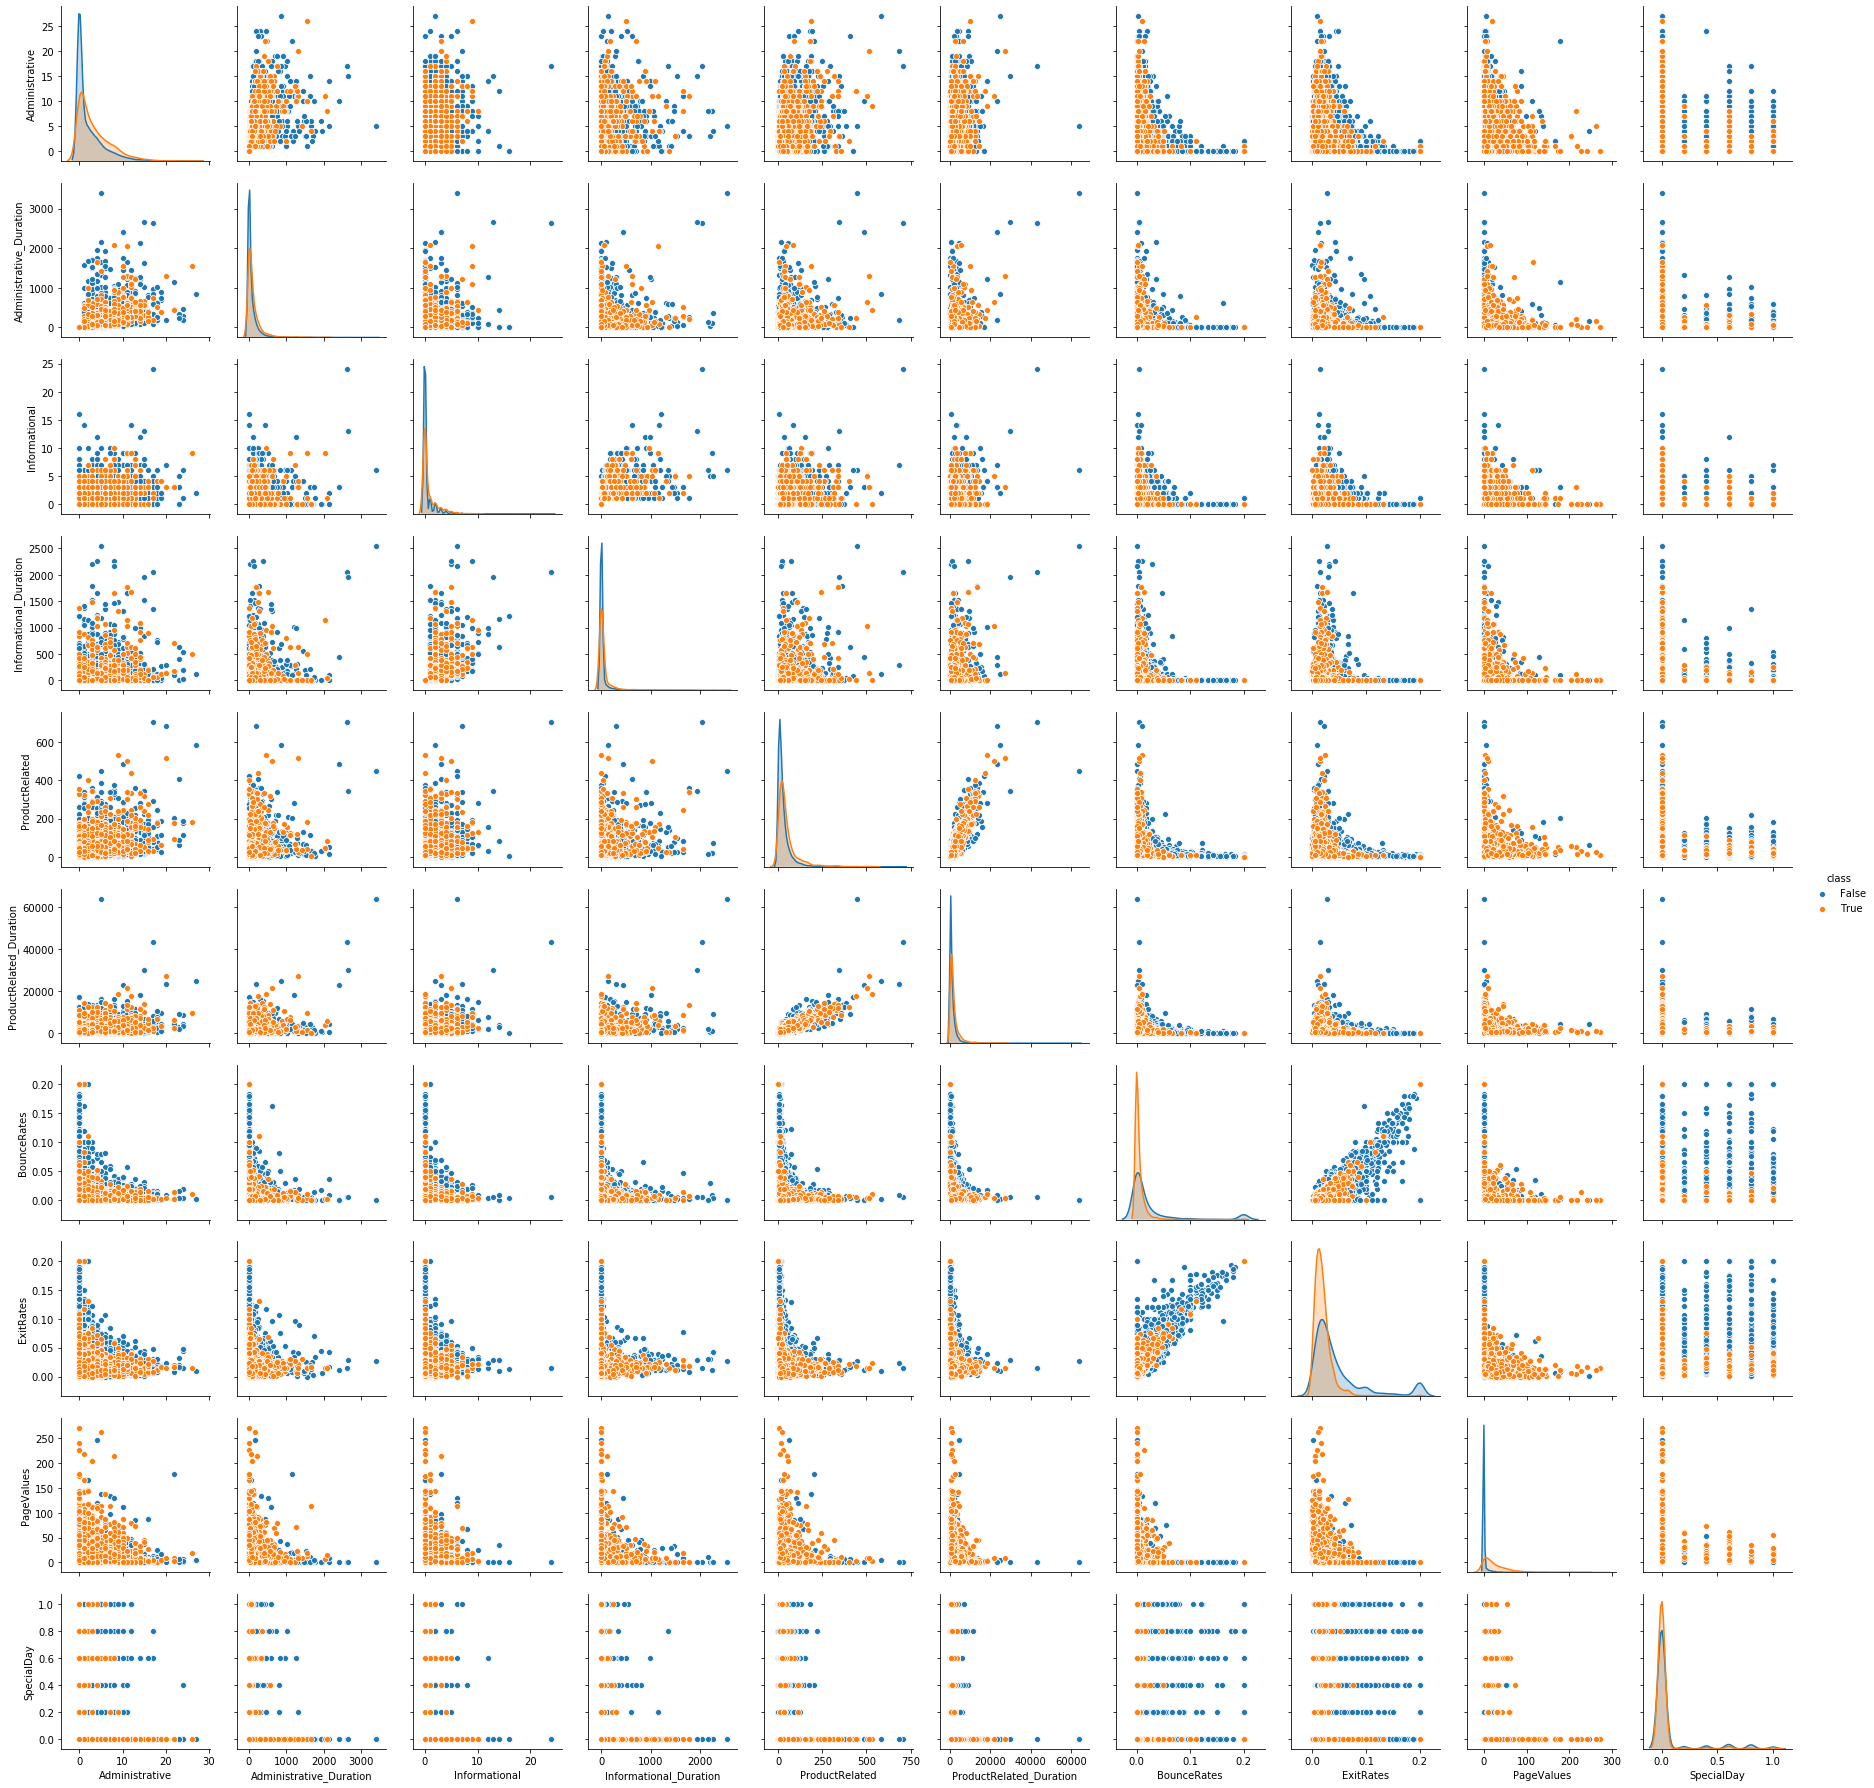

In [19]:
dataf=(X_train).copy()
dataf['class']=y_train
sns.pairplot(dataf,hue='class',vars =numerical_columns)

Text(0.5, 1, 'Correlation ')

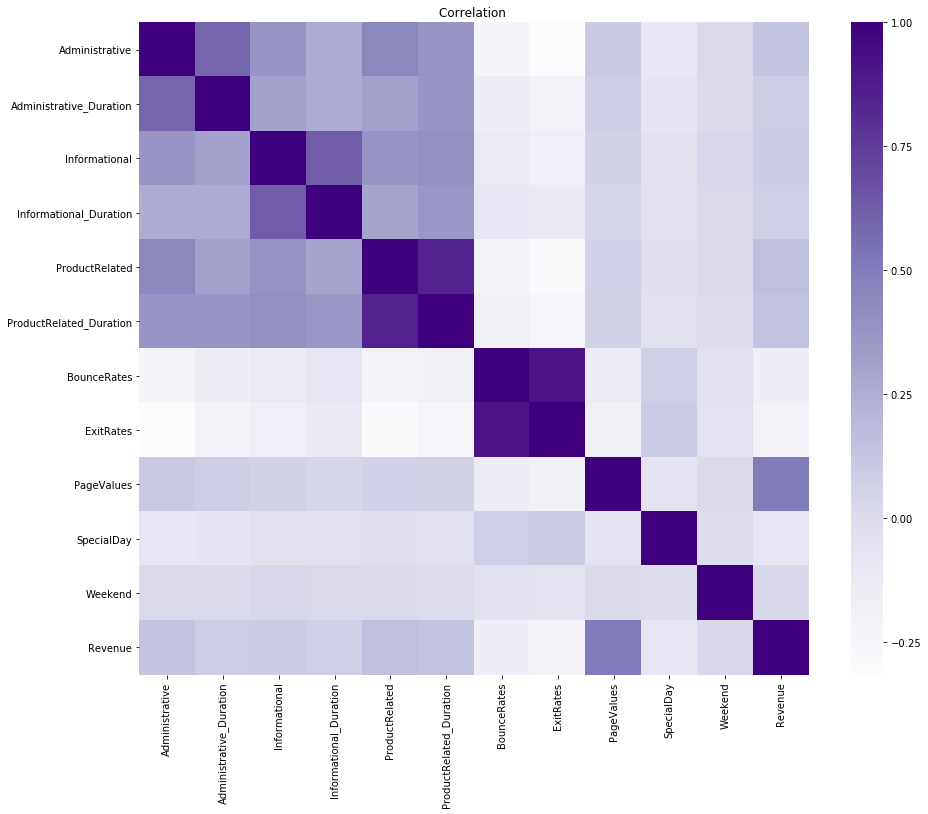

In [30]:
corr=df_train.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

<h1> Результаты классификации

Для классификации настоящих данных предлагаются к сравнению 3 метода: логистическая регрессия, бустинг и обыкновенные нейронные сети. 

In [46]:
df

,train f1,test f1,train acc,test acc
Logistic regression,0.67340,0.67625,0.88391,0.88429
Boosting,0.71424,0.69587,0.90673,0.90051
Neural network,0.68423,0.63327,0.90974,0.89862
